In [1]:
# try to import library, if it is not installed it will be downloaded
import os
try:
  import autoscattering
except:
  if not os.path.isdir('autoscattering'):
    !git clone https://github.com/jlandgr/autoscattering.git
    !mv autoscattering trash
    !mv trash/autoscattering .

In [4]:
import sympy as sp
import jax
jax.config.update("jax_enable_x64", True)

import matplotlib.pyplot as plt
import autoscattering.architecture_optimizer as arch_opt
import autoscattering.constraints as msc
import autoscattering.symbolic as sym

In [5]:
ph1, ph2, ph3 = sp.symbols('ph1 ph2 ph3', real=True) # These phases are free parameters which will be optimised by the optimizer
S_target = sp.Matrix([[0,0,sp.exp(sp.I*ph1)],[sp.exp(sp.I*ph2),0,0],[0,sp.exp(sp.I*ph3),0]])
print('target scattering matrix of a circulator:')
sym.render(S_target)
optimizer = arch_opt.Architecture_Optimizer(
    S_target=S_target,
    num_auxiliary_modes=0,
)
irreducible_graphs = optimizer.perform_depth_first_search()

target scattering matrix of a circulator:


<IPython.core.display.Math object>

fully connected graph is a valid graph
prepare list of all possible graphs


216it [00:00, 484216.82it/s]


216 graphs identified
start depth-first search
complexity level: 9


100%|██████████| 1/1 [00:00<00:00, 42.55it/s]


complexity level: 8


100%|██████████| 6/6 [00:00<00:00, 77.71it/s]


complexity level: 7


100%|██████████| 15/15 [00:00<00:00, 26.60it/s]


complexity level: 6


100%|██████████| 10/10 [00:00<00:00, 49.96it/s]


complexity level: 5


0it [00:00, ?it/s]


complexity level: 4


0it [00:00, ?it/s]


complexity level: 3


0it [00:00, ?it/s]


complexity level: 2


0it [00:00, ?it/s]


complexity level: 1


0it [00:00, ?it/s]


complexity level: 0


0it [00:00, ?it/s]

optimisation finished, list of irreducible graphs has 3 elements


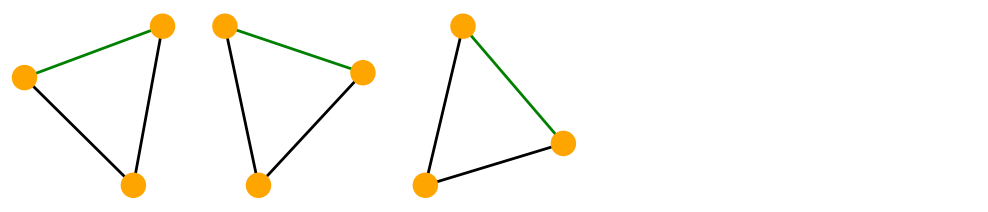

In [6]:
node_colors = ['orange', 'orange', 'orange'] # the port modes are orange, there is no auxiliary mode
msc.plot_list_of_graphs(irreducible_graphs, node_colors=node_colors)